#TASK_7 ASSMT_10
#glass.data: KNN test,train.txt
#KNN manhattan,euclidian comparision
# RANGANADH NARAYANAM

In [ ]:
#1
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
#from sklearn import datasets, neighbors
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from scipy.spatial import distance


In [ ]:
#1
df = pd.read_csv('/content/glass.data',names = ["row","RI", "Na", "Mg", "Al","Si","K","Ca","Ba","Fe","Type"])
df.head()

,row,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
#1
df.shape

(214, 11)

In [ ]:
#1
df.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

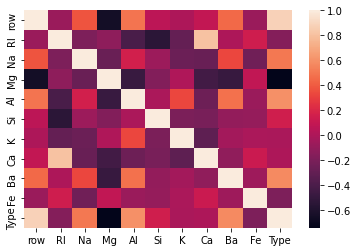

In [ ]:
cor = df.corr()
sns.heatmap(cor)

In [ ]:
#So from above we can drop Ca, and K 
#Then Feature scaling

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df.drop('Type',axis=1))

StandardScaler()

In [ ]:
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler()

In [ ]:
scaled_features = scaler.transform(df.drop('Type',axis=1))
scaled_features

array([[-1.72397593,  0.87286765,  0.28495326, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-1.70778837, -0.24933347,  0.59181718, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-1.6916008 , -0.72131806,  0.14993314, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 1.6916008 ,  0.75404635,  1.16872135, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [ 1.70778837, -0.61239854,  1.19327046, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [ 1.72397593, -0.41436305,  1.00915211, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,row,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-1.723976,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-1.707788,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-1.691601,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-1.675413,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-1.659226,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [ ]:
#KNN ML Model application

In [ ]:
dff = df_feat.drop(['Ca','K'],axis=1) #Removing features - Ca and K 
X_train,X_test,y_train,y_test  = train_test_split(dff,df['Type'],test_size=0.3,random_state=45) 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4,metric='manhattan')

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [ ]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.83      1.00      0.91        20
           2       0.91      0.81      0.86        26
           3       0.00      0.00      0.00         3
           5       0.33      1.00      0.50         1
           6       0.50      1.00      0.67         2
           7       1.00      0.85      0.92        13

    accuracy                           0.85        65
   macro avg       0.60      0.78      0.64        65
weighted avg       0.84      0.85      0.83        65



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_score(y_test,y_pred)


0.8461538461538461

In [ ]:
#From KNN text files

In [ ]:
train = pd.read_csv("trainKNN.txt", header=None)
train.columns = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
train = train.drop('ID', axis=1) # Drop ID since irrelevant to predictions
test = pd.read_csv('testKNN.txt', header=None)
test.columns=['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
test = test.drop('ID', axis=1)

In [ ]:
train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
test.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


In [ ]:
train.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


In [ ]:
test.describe()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,1.519131,13.763333,1.873889,1.342222,72.820000,0.253889,9.460556,0.292778,0.130556,4.000000
std,0.002791,1.083491,1.749753,0.581312,0.892004,0.265133,1.380432,0.617422,0.164798,2.222876
min,1.511150,12.850000,0.000000,0.340000,71.360000,0.000000,6.650000,0.000000,0.000000,1.000000
25%,1.517412,13.012500,0.000000,0.877500,72.212500,0.000000,8.635000,0.000000,0.000000,2.000000
50%,1.519515,13.355000,2.395000,1.320000,72.685000,0.175000,9.065000,0.000000,0.015000,4.000000
75%,1.521055,14.220000,3.570000,1.902500,73.382500,0.502500,10.090000,0.112500,0.240000,6.000000
max,1.523000,17.380000,3.780000,2.170000,75.410000,0.760000,12.500000,1.670000,0.510000,7.000000


In [ ]:
#standardize data
def standardize (df):
    for col in df.columns:
        if col != "Type of glass": # Don't standardize the categories
            df[col] = (df[col] - df[col].mean())/df[col].std()
    return df

In [ ]:
train = standardize(train)
test = standardize(test)
train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,0.888537,0.338119,1.242977,-0.720654,-1.120263,-0.682898,-0.113060,-0.33849,-0.581932,1
1,-0.224221,0.657345,0.603903,-0.191863,0.123880,-0.058551,-0.760269,-0.33849,-0.581932,1
2,-0.692234,0.197659,0.568000,0.174223,0.464382,-0.192340,-0.795443,-0.33849,-0.581932,1
3,-0.207857,-0.210950,0.668529,-0.334230,-0.033275,0.075237,-0.485909,-0.33849,-0.581932,1
4,-0.286405,-0.134335,0.618265,-0.435920,0.582248,0.045506,-0.591432,-0.33849,-0.581932,1


In [ ]:
# suppose k = 8
euclid_model = KNeighborsClassifier(n_neighbors=8, metric=distance.sqeuclidean) # Square Euclidean distance model
manhattan_model = KNeighborsClassifier(n_neighbors=8, metric=distance.cityblock) # Manhattan distance model
x_train = train.drop(["Type of glass"], axis=1)
y_train = train["Type of glass"]
euclid_model.fit(x_train,y_train) # Train models
manhattan_model.fit(x_train, y_train)
x_test = test.drop("Type of glass", axis=1) 
y_test = test["Type of glass"]

In [ ]:
manhattan_predictions = manhattan_model.predict(x_test)
euclid_predictions = euclid_model.predict(x_test) 
df = pd.DataFrame({'actual': y_test, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()

,actual,manhattan,euclid
0,1,1,1
1,1,1,1
2,1,1,1
3,2,2,2
4,2,1,1


In [ ]:
manhattan_count = len(df.loc[df['manhattan'] == df['actual']])
euclid_count = len(df.loc[df['euclid'] == df['actual']])
print('Manhattan Accuracy: {}%'.format(round(100*manhattan_count/len(df), 2)))
print(classification_report(y_test, manhattan_predictions, target_names=df['actual'].astype(str).unique()))
print ('\n')
print('Square Euclidean Accuracy: {}%'.format(round(100*euclid_count/len(df), 2)))
print(classification_report(y_test, euclid_predictions, target_names=df['actual'].astype(str).unique()))

Manhattan Accuracy: 66.67%
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         3
           2       0.25      0.33      0.29         3
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3

    accuracy                           0.67        18
   macro avg       0.62      0.67      0.63        18
weighted avg       0.62      0.67      0.63        18



Square Euclidean Accuracy: 61.11%
              precision    recall  f1-score   support

           1       0.60      1.00      0.75         3
           2       0.33      0.67      0.44         3
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Manhattan Accuracy: 66.67%
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         3
           2       0.25      0.33      0.29         3
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3

    accuracy                           0.67        18
   macro avg       0.62      0.67      0.63        18
weighted avg       0.62      0.67      0.63        18



Square Euclidean Accuracy: 61.11%
              precision    recall  f1-score   support

           1       0.60      1.00      0.75         3
           2       0.33      0.67      0.44         3
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
# suppose k = 4
euclid_model = KNeighborsClassifier(n_neighbors=4, metric=distance.sqeuclidean) # Square Euclidean distance model
manhattan_model = KNeighborsClassifier(n_neighbors=4, metric=distance.cityblock) # Manhattan distance model
x_train = train.drop(["Type of glass"], axis=1)
y_train = train["Type of glass"]
euclid_model.fit(x_train,y_train) # Train models
manhattan_model.fit(x_train, y_train)
x_test = test.drop("Type of glass", axis=1) 
y_test = test["Type of glass"]

In [ ]:
manhattan_predictions = manhattan_model.predict(x_test)
euclid_predictions = euclid_model.predict(x_test) 
df = pd.DataFrame({'actual': y_test, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()

,actual,manhattan,euclid
0,1,1,1
1,1,1,1
2,1,1,1
3,2,2,2
4,2,2,2


In [ ]:
manhattan_count = len(df.loc[df['manhattan'] == df['actual']])
euclid_count = len(df.loc[df['euclid'] == df['actual']])
print('Manhattan Accuracy: {}%'.format(round(100*manhattan_count/len(df), 2)))
print(classification_report(y_test, manhattan_predictions, target_names=df['actual'].astype(str).unique()))
print ('\n')
print('Square Euclidean Accuracy: {}%'.format(round(100*euclid_count/len(df), 2)))
print(classification_report(y_test, euclid_predictions, target_names=df['actual'].astype(str).unique()))

Manhattan Accuracy: 66.67%
              precision    recall  f1-score   support

           1       0.60      1.00      0.75         3
           2       0.33      0.67      0.44         3
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         3

    accuracy                           0.67        18
   macro avg       0.66      0.67      0.63        18
weighted avg       0.66      0.67      0.63        18



Square Euclidean Accuracy: 61.11%
              precision    recall  f1-score   support

           1       0.60      1.00      0.75         3
           2       0.33      0.67      0.44         3
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat